# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Sifa Urrohmah
- Email:zipau2611@gmail.com
- Id Dicoding: sifa_urrohmah

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan sepeda setiap bulannya dari tahun 2011-2012?
- Bagaimana jumlah penggunaan sepeda pada hari workingday, holiday dan weekday?
- Bagaimana perbandingan penggunan sepeda saat kondisi Spring, Summer, Fall dan Winter?  

## Menyiapkan semua library yang dibuthkan

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


#Data Wragling

###Gathering

In [89]:
#tabel day
day_df = pd.read_csv ('/gdrive/MyDrive/Dataset/Bikedataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [90]:
#tabel hour
hour_df = pd.read_csv ('/gdrive/MyDrive/Dataset/Bikedataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#Assessing Data

In [91]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [92]:
#cek missing value
day_df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [93]:
#cek apakah ada duplikat adat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [94]:
#cek parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####hour_df

In [95]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [96]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [97]:
#cek apakah ada duplikat adat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [98]:
#cek parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [99]:
day_df.drop(['instant', 'windspeed', 'temp','atemp', 'hum'], axis=1, inplace=True)

In [100]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [101]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


In [102]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather'] = day_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


In [103]:

# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather'] = day_df.weather.astype('category')
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,82,1518,1600


###Exploratory Data Analysis (EDA)

In [104]:
day_df.groupby(by="month").agg({
    "count": ["max", "min", "mean", "sum"]
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [105]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

In [106]:
day_df.groupby(by="weekday").agg({
    "count": ["max", "min", "mean"]
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

In [107]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

In [108]:
day_df.to_csv("day.csv", index=False)


In [109]:
day_df.to_csv("all_data.csv", index=False)

#Visualization & Explanatory Analysis

###Pertanyaan 1

In [45]:
monthly_user = day_df.resample(rule='M', on='dateday').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})
monthly_user.index = monthly_user.index.strftime('%b-%y') #mengubah format order date menjadi Tahun-Bulan
monthly_user = monthly_user.reset_index()
monthly_user = monthly_user.rename(columns={'dateday': 'yearmonth'})
monthly_user.head()

,yearmonth,casual,registered,count
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


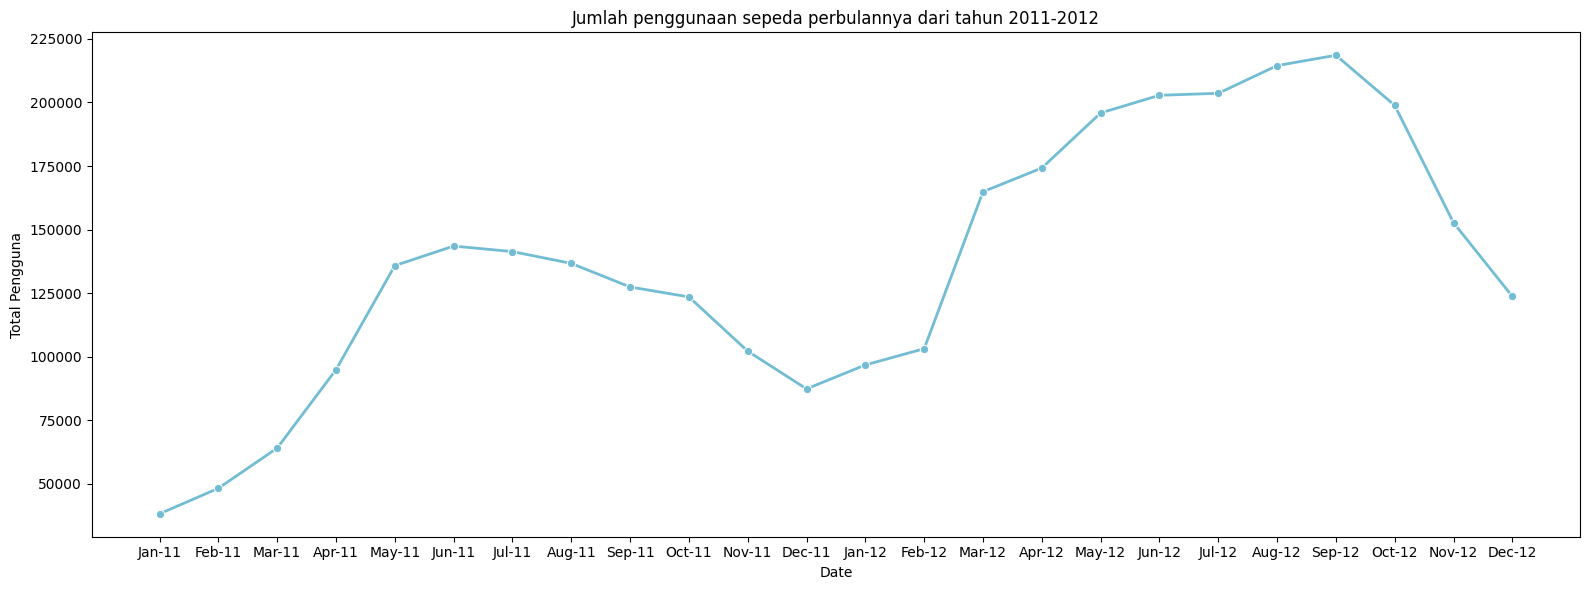

In [46]:
plt.figure(figsize=(16,6))

sns.lineplot(x="yearmonth", y="count", data=monthly_user, marker='o',
    linewidth=2, color="#72BCD4")


plt.xlabel("Date")
plt.ylabel("Total Pengguna")
plt.title("Jumlah penggunaan sepeda perbulannya dari tahun 2011-2012")
plt.tight_layout()
plt.show()

###Pertanyaan 2

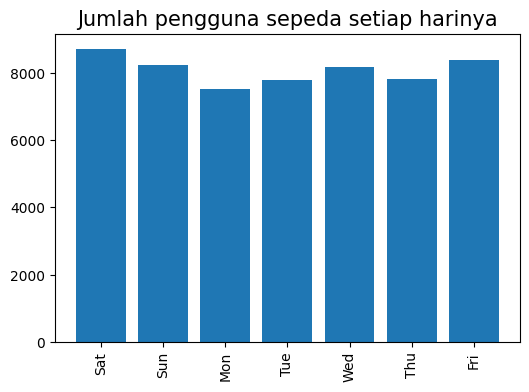

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
ax.bar(day_df['weekday'],day_df['count'])
plt.xticks(rotation=90)
plt.title("Jumlah pengguna sepeda setiap harinya", loc="center", fontsize=15)
plt.show()

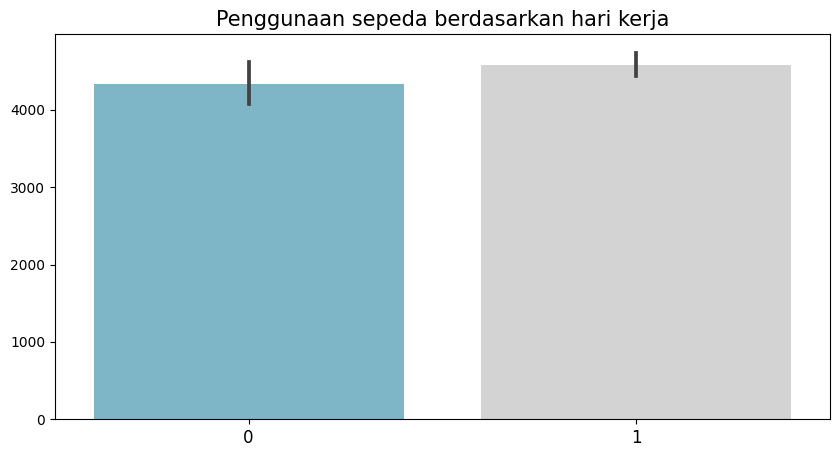

In [ ]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3"]
sns.barplot(
    y="count",
    x="workingday",
    data=day_df.sort_values(by="workingday", ascending=False),
    palette=colors
)
plt.title("Penggunaan sepeda berdasarkan hari kerja", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

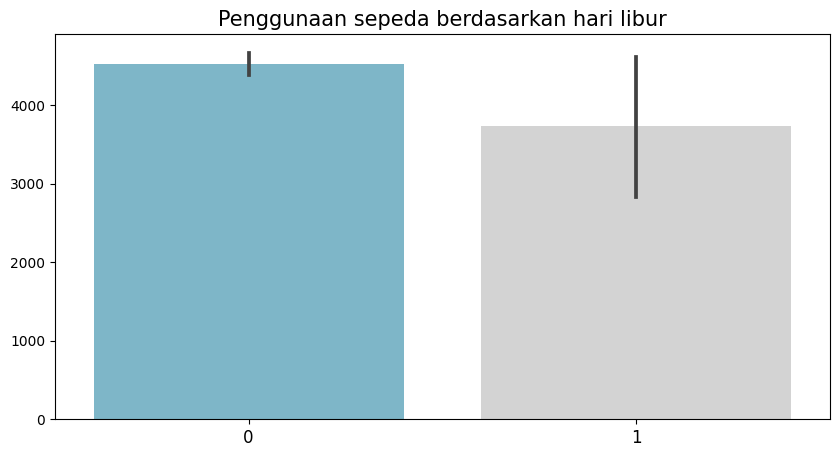

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="holiday",
    data=day_df.sort_values(by="holiday", ascending=False),
    palette=colors
)
plt.title("Penggunaan sepeda berdasarkan hari libur", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

###Pertanyaan 3

In [ ]:
season_dua = day_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

season_dua = season_dua.reset_index()
season_dua.head()

,season,casual,registered,count
0,Fall,226091,835038,1061129
1,Spring,60622,410726,471348
2,Summer,203522,715067,918589
3,Winter,129782,711831,841613


In [ ]:
season_satu = ['Spring', 'Summer', 'Fall', 'Winter']

In [ ]:
season_user_unpivoted = pd.melt(season_dua,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')
season_user_unpivoted


<ipython-input-32-a168b289d1b5>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  season_user_unpivoted = pd.melt(season_dua,


,season,status,count
0,Fall,casual,226091
1,Spring,casual,60622
2,Summer,casual,203522
3,Winter,casual,129782
4,Fall,registered,835038
5,Spring,registered,410726
6,Summer,registered,715067
7,Winter,registered,711831


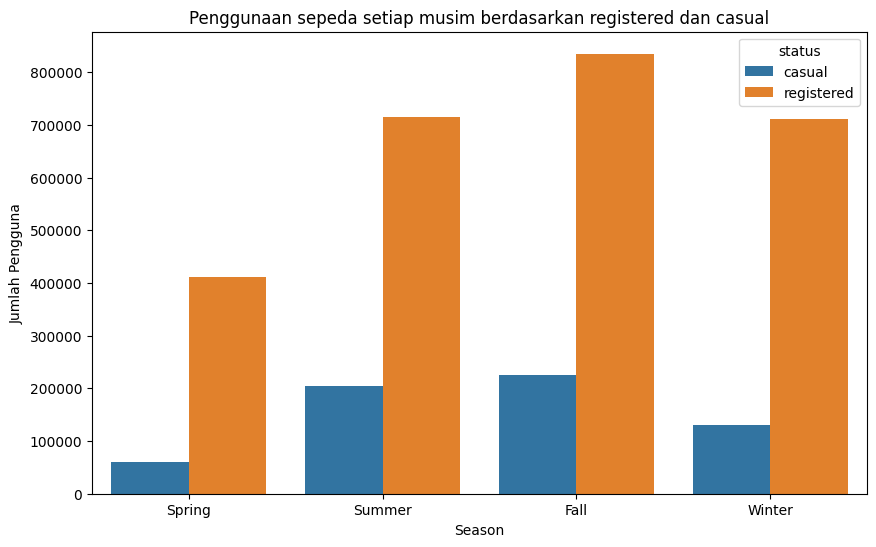

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=season_user_unpivoted, order=season_satu, hue='status')

plt.xlabel("Season")
plt.ylabel("Jumlah Pengguna")
plt.title("Penggunaan sepeda setiap musim berdasarkan registered dan casual")

plt.show()

## Conclusion

- Conclution pertanyaan 1


Dari pengolahan data yang telah di lakukan penggunaan sepeda pada tahun 2012 mengalami kenaikin dari tahun 2011. Pada tahuan 2012 penyewaan sepeda tertinggi yaitu pada bulan september dan terendah yaitu pada bulan januari sedangkan tahun 2011 penyewaan sepeda tertinggi yaitu pada bulan juni dan terendaah pada bulan januari.

- Conclution pertanyaan 2

Penggunaan sepeda lebih banyak terjadi pada hari kerja yaitu hari senin sampai juma'at dibandingkan dengan akhir pekan yaitu sabtu dan minggu dimana hari jum'at menjadi hari yang paling tetinggi penggunaan sepedanya dan hari minggu menjadi hari yang paling sedikit.Hal itu berarti bahwa penggunaan sepeda lebih banyak dilakukan pada hari biasa di banding hari libur.

- Conclution pertanyaan 3

Pada musim gugur jumlah penggunaan sepeda menjadi yang tertinggi kemudian musim panas, musim dingin dan yang paling sedikit yaitu musim semi.
